In [1]:
import elf 
import siesta_utils.grid as siesta 
from siesta_utils.conversions import AtoBohr
from ase.io import read, write
import numpy as np 
# import xcml
import pickle
import re
from ase import Atoms
from elf import ElF
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

In [3]:
def water_local(coords):
    
    axis1 = coords[1] - coords[0]
    axis2 = coords[2] - coords[0]
    axis3 = np.cross(axis1, axis2)
    axis1 /= np.linalg.norm(axis1)
    axis2 /= np.linalg.norm(axis2)
    axis3 /= np.linalg.norm(axis3)
    return elf.geom.get_euler_angles(np.array([axis1, axis2, axis3]))

In [4]:
basis = {'r_o_o': 1.0,'r_i_o': 0.05, 'r_i_h': 0.0, 'r_o_h' : 1.5,
                      'n_rad_o' : 2,'n_rad_h' : 1, 'n_l_o' : 3,
                      'n_l_h' : 2, 'gamma_o': 0, 'gamma_h': 0}

basepath = './outputs/monomers_rotated_origin/node_'
paths = [basepath + '{}/RHO/0'.format(p) for p in range(4)]

atoms = []
coords = []
elfs = []
angles = []
for p in paths:
    atoms.append(elf.siesta.get_atoms(p + '.out'))
    coords.append(atoms[-1].get_positions())
    elfs.append(elf.real_space.get_elfs(atoms[-1], elf.siesta.get_density(p + '.RHOXC'), basis))
    

# elf.geom.get_euler_angles(coords[0])

/home/sebastian/Documents/Physics/Code/ElF/elf/real_space/rs_elf.py:52: RuntimeWarning: invalid value encountered in true_divide
  Theta = np.arccos(Z/R, where = (R != 0))


In [5]:
for c in coords:
    a = water_local(c)
    print(elf.geom.rotate_vector(c, np.array(a), True).round(4))

[[ 0.      0.      0.    ]
 [ 0.9339 -0.2328  0.    ]
 [-0.      0.9625  0.    ]]
[[ 0.      0.      0.    ]
 [ 0.9339 -0.2328 -0.    ]
 [-0.      0.9625 -0.    ]]
[[ 0.      0.      0.    ]
 [ 0.9339 -0.2328  0.    ]
 [-0.      0.9625 -0.    ]]
[[ 0.      0.      0.    ]
 [ 0.9339 -0.2328 -0.    ]
 [-0.      0.9625  0.    ]]


In [6]:
elf_aligned = []
elf_aligned_vector = []
elf_orig = []
for e,c in zip(elfs,coords):
    a = np.array(elf.geom.get_nncs_angles(0, c,None))
    elf_orig.append(elf.geom.make_real_old(e[0].value)[1:4])
    elf_aligned.append(elf.geom.make_real_old(elf.geom.rotate_tensor(e[0].value, a, True)).round(2))
    
    elf_aligned_vector.append(elf.geom.rotate_vector(elf.geom.make_real_old(e[0].value)[1:4].reshape(1,-1),
                                                     a, True).round(2))

In [7]:
coords

[array([[ 0.        ,  0.        ,  0.        ],
        [-0.75846035, -0.59257417,  0.        ],
        [ 0.75846035, -0.59257417,  0.        ]]),
 array([[ 0.        ,  0.        ,  0.        ],
        [-0.10379396,  0.29521583, -0.91020914],
        [-0.49046808, -0.82746993,  0.03377615]]),
 array([[ 0.        ,  0.        ,  0.        ],
        [ 0.70421738,  0.58888498,  0.28930711],
        [-0.5251954 ,  0.54126221, -0.59800607]]),
 array([[ 0.        ,  0.        ,  0.        ],
        [ 0.83185374,  0.48410638, -0.00816232],
        [-0.14922257, -0.22212701, -0.92455312]])]

In [8]:
elf_aligned

[array([227.14,   9.28,  11.87,  -0.  ,   0.49,  -1.95,  -0.  ,  -0.  ,
         -4.38, 106.86,  -6.42,  -8.21,   0.  ,  -0.95,   3.8 ,   0.  ,
         -0.  ,   9.84]),
 array([ 2.2714e+02,  9.2800e+00,  1.1870e+01,  0.0000e+00,  4.9000e-01,
        -1.9500e+00,  0.0000e+00,  0.0000e+00, -4.3800e+00,  1.0686e+02,
        -6.4200e+00, -8.2100e+00,  0.0000e+00, -9.5000e-01,  3.8100e+00,
         1.0000e-02,  0.0000e+00,  9.8500e+00]),
 array([227.14,   9.28,  11.87,  -0.  ,   0.49,  -1.95,  -0.  ,   0.  ,
         -4.38, 106.86,  -6.42,  -8.21,   0.  ,  -0.95,   3.81,  -0.  ,
          0.  ,   9.86]),
 array([ 2.2714e+02,  9.2800e+00,  1.1870e+01, -0.0000e+00,  4.9000e-01,
        -1.9500e+00, -0.0000e+00,  0.0000e+00, -4.3800e+00,  1.0686e+02,
        -6.4200e+00, -8.2100e+00, -0.0000e+00, -9.5000e-01,  3.8100e+00,
        -1.0000e-02,  0.0000e+00,  9.8500e+00])]

In [9]:
elf_aligned_vector

[array([[ 9.28, 11.87, -0.  ]]),
 array([[ 9.28, 11.87,  0.  ]]),
 array([[ 9.28, 11.87, -0.  ]]),
 array([[ 9.28, 11.87, -0.  ]])]

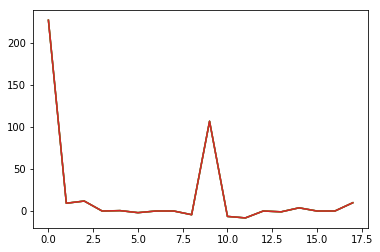

In [10]:
plot(np.array(elf_aligned).T);

In [11]:
for e, c in zip(elfs, coords):
    a = elf.geom.get_elfcs_angles(0, c, e[0].value)
    print(elf.geom.rotate_vector(c,np.array(a), True).round(3))

15.066584285319006
0, Using coordinates for alignment
[[ 0.     0.     0.   ]
 [ 0.593  0.758  0.   ]
 [ 0.593 -0.758  0.   ]]
15.06708693786372
0, Using coordinates for alignment
[[ 0.     0.     0.   ]
 [ 0.593 -0.758  0.   ]
 [ 0.593  0.758 -0.   ]]
15.066456821130696
0, Using coordinates for alignment
[[ 0.     0.     0.   ]
 [ 0.593  0.758  0.   ]
 [ 0.593 -0.758 -0.   ]]
15.067602119010314
0, Using coordinates for alignment
[[ 0.     0.     0.   ]
 [ 0.593  0.758  0.   ]
 [ 0.593 -0.758 -0.   ]]


In [12]:
elf_aligned = []
elf_aligned_vector = []
elf_orig = []
for e,c in zip(elfs,coords):
    a = np.array(elf.geom.get_elfcs_angles(0,c,e[0].value))
    elf_orig.append(elf.geom.make_real_old(e[0].value)[1:4])
    elf_aligned.append(elf.geom.make_real_old(elf.geom.rotate_tensor(e[0].value, a, True)).round(2))

15.066584285319006
0, Using coordinates for alignment
15.06708693786372
0, Using coordinates for alignment
15.066456821130696
0, Using coordinates for alignment
15.067602119010314
0, Using coordinates for alignment


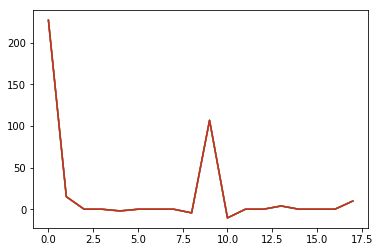

In [13]:
plot(np.array(elf_aligned).T)

In [14]:
def water_local(coords):
    
    axis1 = coords[1] - coords[0]
    axis2 = coords[2] - coords[0]
    axis3 = np.cross(axis1, axis2)
    axis1 /= np.linalg.norm(axis1)
    axis2 /= np.linalg.norm(axis2)
    axis3 /= np.linalg.norm(axis3)
    return elf.geom.get_euler_angles(np.array([axis1, axis2, axis3]))

In [15]:
for e, c in zip(elf_orig,coords):
    ax = c[1]+c[2]
    ax = ax/np.linalg.norm(ax)
#     print(ax)
#     print(e)
    print(ax.dot(e))

15.066584285319006
15.067086910789929
15.066456820764756
15.067602108522644


In [16]:
descr_old = np.genfromtxt('./outputs/monomers_rotated_origin/processed/descriptors_coeff.dat', delimiter = ',')

In [17]:
np.arctan2(0,1)

0.0